<a href="https://colab.research.google.com/github/aayushmarajlawat/DTSC3010_Assignment_1/blob/main/DTSC3010_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Causality and Observational Studies

Your Name

**Learning Objectives:**
- Understand the difference between observational studies and randomized controlled experiments
- Identify treatments, outcomes, and associations in data
- Recognize confounding factors and their impact on conclusions
- Implement and analyze randomized experiments using Python
- Apply statistical thinking to real-world scenarios

---

## Part 1: Setup and Key Concepts

First, let's import the necessary libraries and review our key terms.

In [3]:
!pip install datascience


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.1/725.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00


In [4]:
# Import necessary libraries

from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Key Terms

**Observational Study**: A study where researchers observe data without intervening or controlling the treatment assignment.

**Treatment**: The factor or condition being studied that might affect the outcome.

**Outcome**: The result being measured or observed for each individual.

**Association**: A relationship between treatment and outcome.

**Causal Association (Causality)**: When the treatment directly causes the outcome to occur.

**Comparison**: Examining treatment and control groups to identify associations.

**Treatment Group**: Individuals who receive the treatment.

**Control Group**: Individuals who do not receive the treatment.

**Confounding**: When other factors (besides treatment) differ between groups, making it hard to establish causality.

**Randomization**: Randomly assigning individuals to treatment or control groups.

**Randomized Controlled Experiment (RCT)**: A study where individuals are randomly assigned to treatment/control groups.

**Blind Experiment**: Participants don't know which group they're in.

**Placebo**: Something that looks like the treatment but has no effect.

---

## Part 2: Analyzing an Observational Study

Let's examine a hypothetical observational study about the effect of exercise on heart health.

In [5]:
# Create a dataset representing an observational study
# Individuals: 200 adults
# Treatment: Regular exercise (Yes/No)
# Outcome: Heart disease risk score (0-100, lower is better)

np.random.seed(42)

# Create the data with a confounding factor (age)
n_individuals = 200

# Younger people are more likely to exercise
age = np.random.normal(50, 15, n_individuals)
age = np.clip(age, 20, 80)  # Keep ages between 20-80

# Exercise status depends on age (younger people exercise more)
exercise_prob = 0.8 - (age - 20) / 100  # Higher probability for younger people
exercises = np.random.random(n_individuals) < exercise_prob

# Heart disease risk depends on BOTH age and exercise
# Age increases risk, exercise decreases risk
base_risk = age * 0.6  # Age effect
exercise_effect = -15  # Exercise reduces risk
risk = base_risk + np.where(exercises, exercise_effect, 0) + np.random.normal(0, 8, n_individuals)
risk = np.clip(risk, 0, 100)

# Create a table
exercise_study = Table().with_columns(
    'Individual', np.arange(1, n_individuals + 1),
    'Age', age,
    'Exercises Regularly', exercises,
    'Heart Disease Risk Score', risk
)

exercise_study.show(5)

Individual,Age,Exercises Regularly,Heart Disease Risk Score
1,57.4507,False,33.6003
2,47.926,False,31.9693
3,59.7153,False,41.3503
4,72.8454,False,40.4975
5,46.4877,True,14.6854


### Question 1: Identify the Components

Based on the data above, identify:
- What is the **treatment**?
- What is the **outcome**?
- Who are the **individuals**?
- Is this an **observational study** or a **randomized controlled experiment**? Why?

[link text](https://)**Your Answer Here:**

- Treatment:Regular exercise status
- Outcome: Heart Disease Risk Score
- Individuals: The 200 adults in the dataset
- Study type: Observational study
- Reasoning: Because no one was randomly assigned to exercise

### Question 2: Create Treatment and Control Groups

Separate the data into two groups: those who exercise (treatment group) and those who don't (control group).

In [6]:
# TODO: Create treatment_group table (individuals who exercise)
treatment_group = exercise_study.where('Exercises Regularly', are.equal_to(True))

# TODO: Create control_group table (individuals who don't exercise)
control_group = exercise_study.where('Exercises Regularly', are.equal_to(False))

print(f"Treatment group size: {treatment_group.num_rows}")
print(f"Control group size: {control_group.num_rows}")

Treatment group size: 101
Control group size: 99


### Question 3: Compare Outcomes (Finding Association)

Calculate the average heart disease risk score for each group and perform a **comparison**.

In [7]:
# TODO: Calculate average risk for treatment group
avg_risk_exercise = np.mean(treatment_group.column('Heart Disease Risk Score'))

# TODO: Calculate average risk for control group
avg_risk_no_exercise = np.mean(control_group.column('Heart Disease Risk Score'))

print(f"Average risk (exercises): {avg_risk_exercise:.2f}")
print(f"Average risk (no exercise): {avg_risk_no_exercise:.2f}")
print(f"Difference: {avg_risk_no_exercise - avg_risk_exercise:.2f}")

Average risk (exercises): 13.60
Average risk (no exercise): 30.70
Difference: 17.10


### Question 4: Is There an Association?

Based on your comparison, is there an **association** between exercise and heart disease risk? Can you conclude there is a **causal association** (causality)? Why or why not?

**Your Answer Here:**

- Is there an association? Yes. People who exercise have a lower average heart disease risk score (13.60) than those who don’t (30.70), a difference of about 17.10 points.
- Can we conclude causality? No
- Why or why not? Because this is an observational study, so other factors like age could also affect

### Question 5: Identifying Confounding

Let's investigate whether there's a **confounding** factor by examining the age distribution in both groups.

In [8]:
# TODO: Calculate average age for both groups
avg_age_exercise = np.mean(treatment_group.column('Age'))
avg_age_no_exercise = np.mean(control_group.column('Age'))

print(f"Average age (exercises): {avg_age_exercise:.2f}")
print(f"Average age (no exercise): {avg_age_no_exercise:.2f}")
print(f"Age difference: {avg_age_no_exercise - avg_age_exercise:.2f} years")

Average age (exercises): 46.02
Average age (no exercise): 52.71
Age difference: 6.69 years


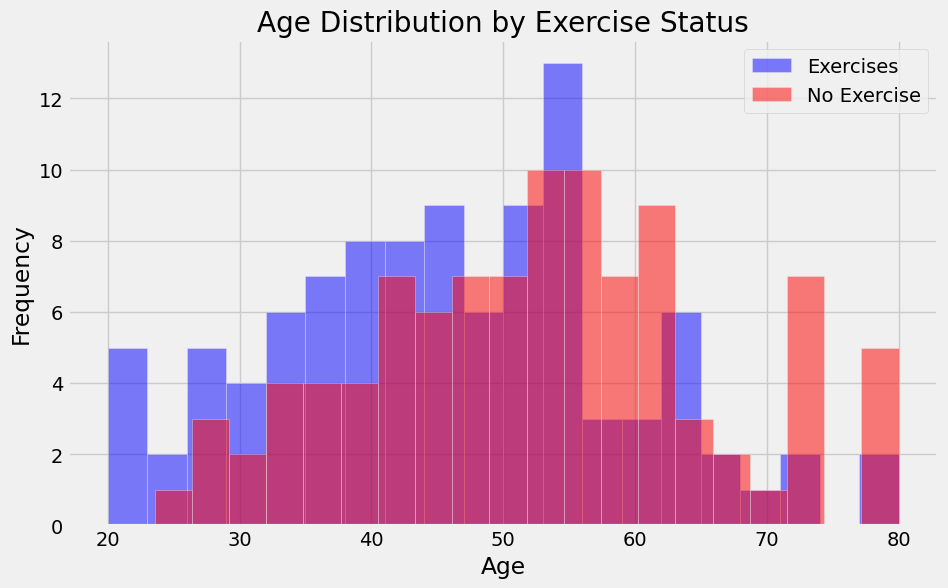

In [9]:
# Visualize the age distributions
plt.figure(figsize=(10, 6))
plt.hist(treatment_group.column('Age'), bins=20, alpha=0.5, label='Exercises', color='blue')
plt.hist(control_group.column('Age'), bins=20, alpha=0.5, label='No Exercise', color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Exercise Status')
plt.legend()
plt.show()

**Question:** How does age act as a **confounding factor** in this study? Explain how it makes it difficult to determine if exercise causes lower heart disease risk.

**Your Answer Here:**

Age is a confounder because the younger people naturally have lower heart disease risk. So the lower risk might be due to age, not exercise.




---

## Part 3: Designing a Randomized Controlled Experiment

To avoid confounding and establish causality, we should conduct a **randomized controlled experiment (RCT)**. Let's simulate one!

### Question 6: Implementing Randomization

Create a new study where we randomly assign individuals to exercise or not exercise.

In [10]:
# Start with the same individuals (same ages)
np.random.seed(123)

n_individuals = 200
age = np.random.normal(50, 15, n_individuals)
age = np.clip(age, 20, 80)

# TODO: Implement RANDOMIZATION - randomly assign treatment
# Use np.random.random() to create a 50-50 split
exercises_random = np.random.random(n_individuals) < 0.5

# Calculate outcomes (same formula as before)
base_risk = age * 0.6
exercise_effect = -15
risk_random = base_risk + np.where(exercises_random, exercise_effect, 0) + np.random.normal(0, 8, n_individuals)
risk_random = np.clip(risk_random, 0, 100)

# Create RCT table
rct_study = Table().with_columns(
    'Individual', np.arange(1, n_individuals + 1),
    'Age', age,
    'Assigned to Exercise', exercises_random,
    'Heart Disease Risk Score', risk_random
)

rct_study.show(5)

Individual,Age,Assigned to Exercise,Heart Disease Risk Score
1,33.7155,True,0
2,64.9602,False,31.5281
3,54.2447,False,22.7649
4,27.4056,True,0
5,41.321,True,2.13194


### Question 7: Verify Random Assignment

Check whether randomization successfully created similar groups (no confounding).

In [11]:
# Separate into treatment and control groups
rct_treatment = rct_study.where('Assigned to Exercise', are.equal_to(True))
rct_control = rct_study.where('Assigned to Exercise', are.equal_to(False))

# Compare average ages
avg_age_rct_treatment = np.mean(rct_treatment.column('Age'))
avg_age_rct_control = np.mean(rct_control.column('Age'))

print("RCT Group Comparison:")
print(f"Treatment group avg age: {avg_age_rct_treatment:.2f}")
print(f"Control group avg age: {avg_age_rct_control:.2f}")
print(f"Age difference: {abs(avg_age_rct_treatment - avg_age_rct_control):.2f} years")
print()
print("Compare to Observational Study:")
print(f"Age difference was: {abs(avg_age_exercise - avg_age_no_exercise):.2f} years")

RCT Group Comparison:
Treatment group avg age: 49.31
Control group avg age: 51.17
Age difference: 1.87 years

Compare to Observational Study:
Age difference was: 6.69 years


### Question 8: Analyze the RCT Results

Calculate and compare outcomes in the randomized experiment.

In [12]:
# TODO: Calculate average outcomes for RCT groups
avg_risk_rct_treatment = np.mean(rct_treatment.column('Heart Disease Risk Score'))
avg_risk_rct_control = np.mean(rct_control.column('Heart Disease Risk Score'))

print("RCT Results:")
print(f"Average risk (treatment): {avg_risk_rct_treatment:.2f}")
print(f"Average risk (control): {avg_risk_rct_control:.2f}")
print(f"Difference: {avg_risk_rct_control - avg_risk_rct_treatment:.2f}")
print()
print("Observational Study Results:")
print(f"Difference was: {avg_risk_no_exercise - avg_risk_exercise:.2f}")

RCT Results:
Average risk (treatment): 14.61
Average risk (control): 30.75
Difference: 16.14

Observational Study Results:
Difference was: 17.10


**Question:**
1. Why is the difference in the RCT more trustworthy than the observational study?
2. Can we now claim **causality**? Why?

**Your Answer Here:**

1. Because it’s randomized, the groups are more similar
2.Yes because random assignment lets us say exercise caused the lower risk

---

## Part 4: Blind Experiments and Placebos

In some experiments, knowledge of treatment assignment can affect outcomes. This is where **blind experiments** and **placebos** come in.

### Question 9: Simulating a Placebo Effect

Let's simulate a medication study where believing you received treatment improves outcomes.

In [13]:
# Simulate a medication study
np.random.seed(456)

n_patients = 150

# Scenario 1: Patients KNOW their assignment (not blind)
treatment_assignment = np.random.random(n_patients) < 0.5  # True = real drug, False = placebo

# Base symptom score (higher = worse symptoms)
baseline_symptoms = np.random.normal(70, 10, n_patients)

# Real drug effect: reduces symptoms by 20 points
drug_effect = -20

# Placebo effect: believing you got treatment reduces symptoms by 8 points
# In non-blind study, only placebo group knows they got placebo (no belief effect)
belief_effect = -8

# Calculate outcomes for NON-BLIND study
symptoms_not_blind = baseline_symptoms.copy()
symptoms_not_blind = symptoms_not_blind + np.where(treatment_assignment, drug_effect, 0)
symptoms_not_blind = symptoms_not_blind + np.where(treatment_assignment, belief_effect, 0)  # Only treatment group believes
symptoms_not_blind = symptoms_not_blind + np.random.normal(0, 5, n_patients)

# Calculate outcomes for BLIND study (everyone believes they might have real drug)
symptoms_blind = baseline_symptoms.copy()
symptoms_blind = symptoms_blind + np.where(treatment_assignment, drug_effect, 0)
symptoms_blind = symptoms_blind + belief_effect  # Everyone gets belief effect
symptoms_blind = symptoms_blind + np.random.normal(0, 5, n_patients)

# Create tables
not_blind_study = Table().with_columns(
    'Patient', np.arange(1, n_patients + 1),
    'Treatment', treatment_assignment,
    'Symptom Score', symptoms_not_blind
)

blind_study = Table().with_columns(
    'Patient', np.arange(1, n_patients + 1),
    'Treatment', treatment_assignment,
    'Symptom Score', symptoms_blind
)

print("Non-Blind Study:")
not_blind_study.show(5)

Non-Blind Study:


Patient,Treatment,Symptom Score
1,True,50.4972
2,True,37.8408
3,False,83.7864
4,False,102.623
5,False,74.9455


In [14]:
# Analyze both studies
print("NON-BLIND STUDY (patients know their assignment):")
not_blind_treatment = not_blind_study.where('Treatment', are.equal_to(True))
not_blind_placebo = not_blind_study.where('Treatment', are.equal_to(False))
diff_not_blind = np.mean(not_blind_placebo.column('Symptom Score')) - np.mean(not_blind_treatment.column('Symptom Score'))
print(f"Average symptoms (treatment): {np.mean(not_blind_treatment.column('Symptom Score')):.2f}")
print(f"Average symptoms (placebo): {np.mean(not_blind_placebo.column('Symptom Score')):.2f}")
print(f"Apparent drug effect: {diff_not_blind:.2f}")
print()

print("BLIND STUDY (patients don't know their assignment):")
blind_treatment = blind_study.where('Treatment', are.equal_to(True))
blind_placebo = blind_study.where('Treatment', are.equal_to(False))
diff_blind = np.mean(blind_placebo.column('Symptom Score')) - np.mean(blind_treatment.column('Symptom Score'))
print(f"Average symptoms (treatment): {np.mean(blind_treatment.column('Symptom Score')):.2f}")
print(f"Average symptoms (placebo): {np.mean(blind_placebo.column('Symptom Score')):.2f}")
print(f"Apparent drug effect: {diff_blind:.2f}")
print()

print(f"True drug effect (from simulation): 20 points")
print(f"Bias in non-blind study: {diff_not_blind - 20:.2f} points")

NON-BLIND STUDY (patients know their assignment):
Average symptoms (treatment): 41.14
Average symptoms (placebo): 69.58
Apparent drug effect: 28.45

BLIND STUDY (patients don't know their assignment):
Average symptoms (treatment): 41.56
Average symptoms (placebo): 62.22
Apparent drug effect: 20.66

True drug effect (from simulation): 20 points
Bias in non-blind study: 8.45 points


**Question:**
1. Why does the **blind** study give a more accurate estimate of the true drug effect?
2. What role does the **placebo** play in a blind experiment?
3. Why is it important to use a placebo rather than nothing in the control group?

**Your Answer Here:**

1. Because patients don’t know what they got
2. Keeps both groups’ expectations the same, so we can measure the real drug effect.
3. Because getting “nothing” would make people know they’re in the control group, which can change symptoms and bias the comparison.

---

## Part 5: Real-World Application - Epidemiology

**Epidemiology** is the study of how diseases spread. John Snow's cholera investigation is a classic example. Let's recreate a simplified version.

### Question 10: John Snow's Water Company Study

Recreate Snow's comparison of the two water companies using simulated data.

In [15]:
# Simulate Snow's water company data
# Southwark & Vauxhall (S&V): contaminated water
# Lambeth: clean water

np.random.seed(789)

# Number of houses
n_sv_houses = 40000
n_lambeth_houses = 26000

# Death rates (per 10,000 houses)
# S&V had contaminated water -> higher cholera rate
sv_death_rate = 0.0315  # 315 per 10,000
lambeth_death_rate = 0.0037  # 37 per 10,000

# Simulate deaths
sv_deaths = np.random.binomial(1, sv_death_rate, n_sv_houses)
lambeth_deaths = np.random.binomial(1, lambeth_death_rate, n_lambeth_houses)

# Create summary table
water_company_study = Table().with_columns(
    'Water Company', ['Southwark & Vauxhall', 'Lambeth'],
    'Number of Houses', [n_sv_houses, n_lambeth_houses],
    'Deaths from Cholera', [np.sum(sv_deaths), np.sum(lambeth_deaths)]
)

# Calculate death rates per 10,000
death_rates = water_company_study.column('Deaths from Cholera') / water_company_study.column('Number of Houses') * 10000
water_company_study = water_company_study.with_column('Deaths per 10,000 Houses', death_rates)

water_company_study

Water Company,Number of Houses,Deaths from Cholera,"Deaths per 10,000 Houses"
Southwark & Vauxhall,40000,1211,302.75
Lambeth,26000,93,35.7692


**Question:**
1. What is the **treatment** in this study?
2. What is the **outcome**?
3. Is this an observational study or RCT?
4. Why did Snow consider this a "grand experiment" even though it wasn't randomized?
5. What made this study strong evidence for **causality** despite not being an RCT?

**Your Answer Here:**

1. Treatment: Which water company/water source the house used
2. Outcome:Cholera deaths (death rate per 10,000 houses)
3. Study type: Observational study
4. Why "grand experiment": Households were effectively “assigned” a water company by pipe connections/location, not by choice.
5. Why strong evidence: Groups were similar and only differed in water source, and the cholera death rate was much higher with the contaminated water.

### Question 11: Visualizing the Evidence

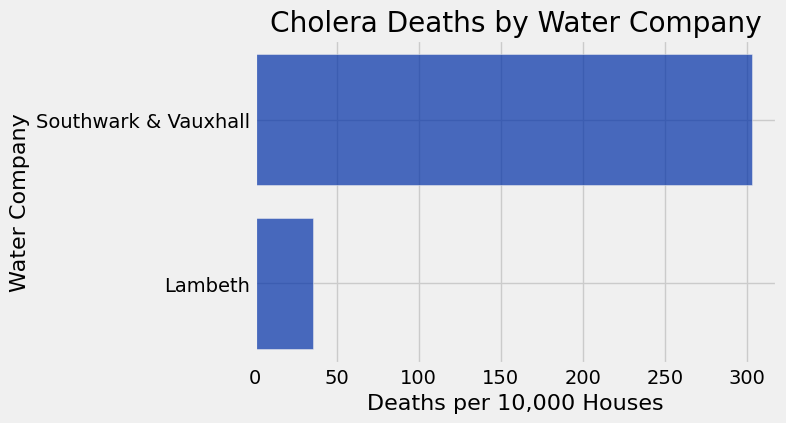

In [16]:
# TODO: Create a bar chart comparing death rates
water_company_study.barh('Water Company', 'Deaths per 10,000 Houses')
plt.xlabel('Deaths per 10,000 Houses')
plt.title('Cholera Deaths by Water Company')
plt.show()

---

## Part 6: Challenge Problems

### Challenge 1: Design Your Own Study

Choose a research question and design both an observational study and an RCT to investigate it. Create simulated data for both.

Your research question should:
- Have a clear treatment and outcome
- Include at least one potential confounding factor
- Be realistic

Examples:
- Does studying with music improve test scores?
- Does eating breakfast improve athletic performance?
- Does social media use affect mental health?

In [ ]:
# TODO: Your research question:
#

# TODO: Create observational study data with confounding

# TODO: Create RCT data

# TODO: Compare results

### Challenge 2: Sample Size and Randomization

Investigate how randomization works with different sample sizes. Create three RCTs with sample sizes of 20, 100, and 500 participants. Check how well randomization balances a confounding factor (e.g., age) in each case.

In [17]:
# TODO: Create RCTs with different sample sizes
# Compare how well randomization balances confounding factors

def create_rct(n):
    """Create an RCT with n participants"""
    # Your code here
    pass

# Test with different sizes
for size in [20, 100, 500]:
    print(f"\nSample size: {size}")
    # Analyze balance


Sample size: 20

Sample size: 100

Sample size: 500


### Challenge 3: Multiple Confounding Factors

Create an observational study where there are THREE confounding factors. Then design an RCT and show how randomization addresses all three simultaneously.

In [ ]:
# TODO: Create a complex observational study
# with multiple confounding factors

# TODO: Show how RCT addresses all confounders

---

## Part 7: Reflection Questions

Answer these questions based on what you've learned:

**1. When is it ethical to conduct an RCT? When is it not?**

Your answer:

**2. Give an example of a real-world situation where we can only use observational studies, not RCTs. What makes RCTs impossible or unethical in this case?**

Your answer:

**3. Explain in your own words: Why is randomization so powerful for establishing causality?**

Your answer:

**4. Find a news article that reports on a scientific study. Identify:**
- The treatment and outcome
- Whether it was observational or experimental
- Any potential confounding factors
- Whether the article's conclusions are justified

Your answer (include article link):

---

## Summary

In this assignment, you learned:

1. **Observational studies** can show associations but confounding makes causality hard to prove
2. **Randomization** is the key to avoiding confounding
3. **RCTs** are the gold standard for establishing causality
4. **Blind experiments** with **placebos** prevent bias from knowledge of treatment
5. **Comparison** between treatment and control groups is essential
6. **Epidemiology** uses these methods to study disease
7. Python can help us simulate and analyze different study designs

### Key Takeaway
**Association does not imply causation** — but careful experimental design can help us establish causal relationships!